### Lab 6 - Word2Vec Tutorial using Gensim

In [1]:
import os
import pandas as pd
import nltk
import gensim
from gensim import corpora, models, similarities

#### Preprocessing data  - Your own data .. Sample from Project Gutenberg

In [2]:
import string

from urllib.request import urlopen
import nltk, re, pprint
from nltk import word_tokenize
# sent_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
from nltk import tokenize

In [4]:
### Download and load  "The Importance of Being Earnest A Trivial Comedy for Serious People" by Oscar 
## Wilde from Project Gutenberg : https://www.gutenberg.org


url = "http://www.gutenberg.org/cache/epub/844/pg844.txt" ## Your raw text file location 
resp = urlopen(url)
raw = resp.read().decode('utf8')
firstlook = tokenize.sent_tokenize(raw)


In [5]:
pattern = r'''(?x)  # set flag to allow verbose regexps
(?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
|\w+(?:[-']\w+)*    # words with optional internal hyphens
|\$?\d+(?:\.\d+)?   # currency, e.g. $12.80 
|\.\.\.             # elipses
|[.,;"'?()-_`]      # these are separate tokens
'''
#print(nltk.regexp_tokenize(raw,pattern))
tokenized_raw =" ".join( nltk.regexp_tokenize(raw,pattern))
tokenized_raw=tokenize.sent_tokenize(tokenized_raw)



In [6]:
len(tokenized_raw[:10])

10

**Normalize the text.** Now adjust the output by normalizing the text: things you can try include lowercasing the text, improving the tokenization, and/or doing other adjustments to bring content words higher up in the results. 

(Note: Readers with NLP background, do it is generally not advised to remove stop words as they can throw context which the algorithm can learn.)

In [7]:
nopunct=[]
for sent in tokenized_raw:
    a=[w for w in sent.split() if w not in string.punctuation]
    nopunct.append(" ".join(a))
#create a set of stopwords
tok_corp= [nltk.word_tokenize(sent) for sent in nopunct]

In [8]:
### creating a list of unique words 

combined_list=[" ".join(w) for w in tok_corp]
unique_list=[]
for sent in combined_list:
    unique_list.append([w for w in sent.split()])
unique_list=list(set([item for sublist in unique_list for item in sublist]))

In [13]:
unique_words=unique_list

#####  Loading pretrained word2Vec from Google  ; Include relationships 

In [10]:
## For part 1 of the assignment we will use a pretrained word2vec model from Google
## Essentially Google had trained the Word2Vec model on a large cropus of data (billion words plus)
## You can download this pretrained model from https://docs.google.com/a/berkeley.edu/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download
## Once you donload save unzip the file and you should will get another zip file named
## GoogleNews-vectors-negative300.bin. Now you are good to go 

In [14]:
## Use the following command to load up a pretrained model 

model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True) 

In [1]:
## Sample for similarity 

print (model.most_similar(positive=['king'], negative=['man']))

NameError: name 'model' is not defined

#### Trainig Gensim using your own dataset 

In [114]:
### Its just one single command
model = gensim.models.Word2Vec(tok_corp, min_count=1, size = 16, window=5)

## Window size : The parameter that fixes the length of window of words by which the model sweeps 
# the data

## Size: Size of the vector

## min_count: accept a word if it has a certain minimum number of occurances in the document


In [115]:
## Extracting the respective vectors corresponding to the words

vector_list=[] ## n by d matrix contaiing words and their respective vectors
for word in unique_words:
    vector_list.append(model[word])

In [116]:
len(vector_list)

3464

### Dimension redcution using TSNE

In [141]:
## A popular non-linear dimensionality reduction technique that preserves greatly thge local 
## and global structure of the data. Essentially tries to reconstruct the subspace in which the 
## data exists
## We will use the Sklearn TSNE implementation 

from sklearn.manifold import TSNE

# Lets dim reduce the 16 dimension vectors to 2dimensions to vizualise the dataset 
data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(vector_list)


## Parameters
## n_components = number of dimensions you want your data to be reduced
## preplexity =  Number of neighboours to fit the gaussian , normally 30 

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 3464
[t-SNE] Computed conditional probabilities for sample 2000 / 3464
[t-SNE] Computed conditional probabilities for sample 3000 / 3464
[t-SNE] Computed conditional probabilities for sample 3464 / 3464
[t-SNE] Mean sigma: 0.030298
[t-SNE] Iteration 25: error = 1.9606242, gradient norm = 276.5291138
[t-SNE] Iteration 50: error = 1.9606950, gradient norm = 26927042560.0000000
[t-SNE] Iteration 50: error difference 0.000000. Finished.
[t-SNE] Iteration 75: error = 1.9606950, gradient norm = 9184924314254704640.0000000
[t-SNE] Iteration 75: error difference 0.000000. Finished.
[t-SNE] KL divergence after 75 iterations with early exaggeration: 1.960695
[t-SNE] Iteration 100: error = 1.9606950, gradient norm = 5223895970449850144326156288.0000000
[t-SNE] Iteration 100: error difference 0.000000. Finished.
[t-SNE] Error after 100 iterations: 1.960695

In [142]:

## Vizualise
%matplotlib inline
from matplotlib import pyplot as plt



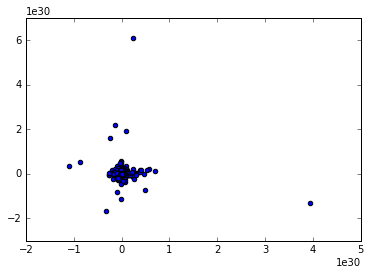

In [144]:
x_axis= data_embed[:,0]
y_axis=data_embed[:,1]

plt.scatter(x_axis, y_axis)
plt.show() ## The plots vary each time you run them 